<a href="https://colab.research.google.com/github/AsheriasI/NTK/blob/main/NTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NTK exploration

## Step 2: Importing Libraries


In [1]:
# Step 2: Import Required Libraries

# 2.1. Install Necessary Libraries
# Install neural-tangents for NTK computations
%pip install neural-tangents

# Install plotly for interactive visualizations
%pip install plotly

# 2.2. Import Standard Libraries
import numpy as np                # Numerical computations
import pandas as pd               # Data manipulation (optional)

# 2.3. Import Visualization Libraries
import matplotlib.pyplot as plt   # Plotting
import seaborn as sns             # Statistical data visualization

# Optional: For interactive plots
import plotly.express as px
import plotly.graph_objs as go

# 2.4. Import Machine Learning Libraries
import torch
import torch.nn as nn
import torch.optim as optim

# 2.5. Import Neural Tangents Library
import neural_tangents as nt      # NTK computations
from neural_tangents import stax  # Neural network layers for NTK

# 2.6. Import Additional Libraries
from sklearn.preprocessing import StandardScaler    # Data preprocessing
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.kernel_ridge import KernelRidge        # Kernel ridge regression
from sklearn.metrics import accuracy_score          # Evaluation metric


## Step 3: Data Preparation

In [2]:
# Import PyTorch libraries for data handling
import torchvision
import torchvision.transforms as transforms


### 3.2

In [3]:
# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors (from [0, 255] to [0.0, 1.0])
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizes with mean and std of MNIST dataset
])

# Download and load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',        # Directory to store the data
    train=True,           # Specifies training set
    download=True,        # Downloads the data if not already present
    transform=transform   # Applies the transformations
)

# Download and load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,          # Specifies test set
    download=True,
    transform=transform
)


### 3.3
Previously, to make the computation easier, we used 0 and 1 only (binary)

In [4]:
# Load the full MNIST dataset without filtering
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Define a transform to convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST dataset
])

# Apply the transform to the datasets
train_dataset.transform = transform
test_dataset.transform = transform


### 3.4

In [5]:

# Function to extract all data from a dataset
def get_all_data(dataset):
    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=len(dataset),
        shuffle=False
    )
    data_iter = iter(loader)
    images, labels = next(data_iter)
    return images, labels

# Get all training data and labels
x_train, y_train = get_all_data(train_dataset)

# Get all test data and labels
x_test, y_test = get_all_data(test_dataset)

# Verify that x_train is a tensor
print(f'Type of x_train before flattening: {type(x_train)}')  # Should be <class 'torch.Tensor'>

# Flatten the images while they are still tensors
x_train = x_train.view(x_train.size(0), -1)  # Shape: [num_samples, 784]
x_test = x_test.view(x_test.size(0), -1)



Type of x_train before flattening: <class 'torch.Tensor'>


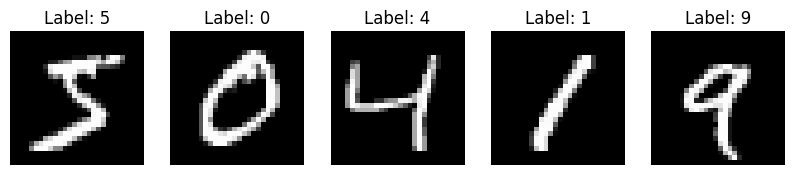

In [6]:
# Plot the first 5 training images to check loading and split was correct
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image = x_train[i].reshape(28, 28)  # Reshape back to 28x28
    label = y_train[i].item()  # Convert tensor to scalar
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.show()


In [7]:
print(f'Type of x_train: {type(x_train)}')  # Should be <class 'torch.Tensor'>
print(f'Type of x_train.size: {type(x_train.size)}')  # Should be <class 'builtin_function_or_method'>


Type of x_train: <class 'torch.Tensor'>
Type of x_train.size: <class 'builtin_function_or_method'>


### 3.5

In [8]:
# Flatten the images
# Since x_train is a NumPy array, use reshape instead of view
x_train = x_train.reshape(x_train.shape[0], -1)  # Shape: [num_samples, 784]
x_test = x_test.reshape(x_test.shape[0], -1)


# Convert labels to NumPy arrays
y_train = y_train.numpy()
y_test = y_test.numpy()

# Convert images to NumPy arrays
x_train = x_train.numpy()
x_test = x_test.numpy()


### 3.6

In [9]:
# # Number of samples to use
# num_train_samples = 2000
# num_test_samples = 500

# # Subset the data
# x_train = x_train[:num_train_samples]
# y_train = y_train[:num_train_samples]
# x_test = x_test[:num_test_samples]
# y_test = y_test[:num_test_samples]


### 3.7

In [10]:
# # Map the labels to 0 and 1
# label_mapping = {classes[0]: 0, classes[1]: 1}
# y_train = np.vectorize(label_mapping.get)(y_train)
# y_test = np.vectorize(label_mapping.get)(y_test)


### 3.8

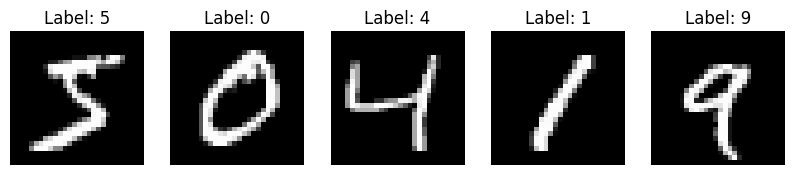

In [11]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the first 5 training images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image = x_train[i].reshape(28, 28)  # Reshape back to 28x28
    label = y_train[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.show()


### 3.9

In [12]:
print(f'x_train shape: {x_train.shape}')  # Should be (num_train_samples, 784)
print(f'y_train shape: {y_train.shape}')  # Should be (num_train_samples,)
print(f'x_test shape: {x_test.shape}')    # Should be (num_test_samples, 784)
print(f'y_test shape: {y_test.shape}')    # Should be (num_test_samples,)


x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


## Step 4

### 4.1

In [13]:
import torch.nn.functional as F

In [14]:
class SimpleNet(nn.Module):
    def __init__(self, input_size=784, hidden_size=256, num_classes=10):
        super(SimpleNet, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to Hidden Layer
        self.activation = nn.ReLU()                          # Activation Function
        self.fc2 = nn.Linear(hidden_size, num_classes) # Hidden Layer to Output

    def forward(self, x):
        out = self.fc1(x)      # Linear Transformation
        out = self.activation(out)   # Non-linear Activation
        out = self.fc2(out)    # Output Layer (Logits)
        return out


### 4.2

In [15]:
# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Create an instance of the neural network
input_size = 784       # 28x28 pixels flattened
hidden_size = 1024     # Number of neurons in the hidden layer
model = SimpleNet(input_size, hidden_size).to(device)


Using device: cuda


In [16]:
# Cross-Entropy Loss for Multiclass Classification
criterion = nn.CrossEntropyLoss()


In [17]:
# Optimizer: Stochastic Gradient Descent (SGD)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


### 4.4

In [18]:
# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).long().to(device)

x_test_tensor = torch.from_numpy(x_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test).long().to(device)


In [19]:
# Create TensorDataset
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor)

# Create DataLoader
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


### 4.5

In [20]:
num_epochs = 20


In [21]:
# Lists to store loss and accuracy
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()        # Backpropagation
        optimizer.step()       # Update parameters

        # Accumulate loss
        epoch_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(train_loader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


Epoch [1/20], Loss: 0.6940, Accuracy: 83.99%
Epoch [2/20], Loss: 0.3428, Accuracy: 90.45%
Epoch [3/20], Loss: 0.2916, Accuracy: 91.74%
Epoch [4/20], Loss: 0.2610, Accuracy: 92.64%
Epoch [5/20], Loss: 0.2380, Accuracy: 93.34%
Epoch [6/20], Loss: 0.2191, Accuracy: 93.87%
Epoch [7/20], Loss: 0.2032, Accuracy: 94.33%
Epoch [8/20], Loss: 0.1895, Accuracy: 94.71%
Epoch [9/20], Loss: 0.1772, Accuracy: 95.06%
Epoch [10/20], Loss: 0.1668, Accuracy: 95.39%
Epoch [11/20], Loss: 0.1574, Accuracy: 95.66%
Epoch [12/20], Loss: 0.1490, Accuracy: 95.92%
Epoch [13/20], Loss: 0.1414, Accuracy: 96.11%
Epoch [14/20], Loss: 0.1343, Accuracy: 96.34%
Epoch [15/20], Loss: 0.1283, Accuracy: 96.50%
Epoch [16/20], Loss: 0.1224, Accuracy: 96.66%
Epoch [17/20], Loss: 0.1171, Accuracy: 96.84%
Epoch [18/20], Loss: 0.1124, Accuracy: 96.97%
Epoch [19/20], Loss: 0.1079, Accuracy: 97.10%
Epoch [20/20], Loss: 0.1036, Accuracy: 97.19%


### 4.6

In [22]:
# Evaluation mode
model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient computation
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 96.84%


### 4.7

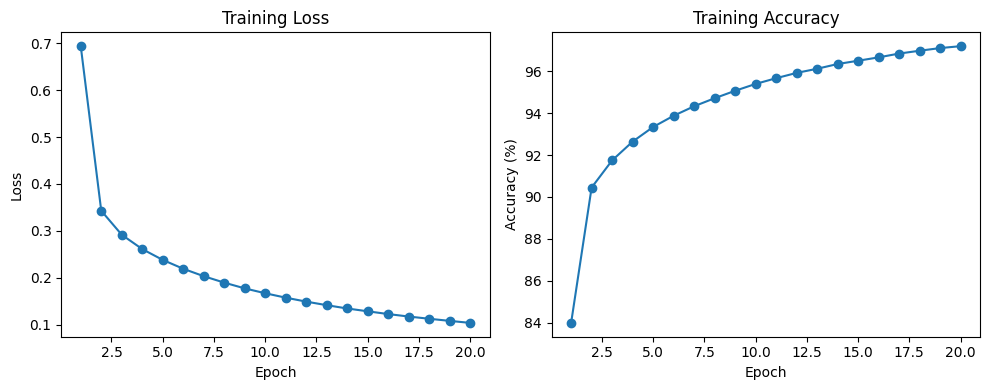

In [23]:
import matplotlib.pyplot as plt

# Plot Loss over Epochs
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot Accuracy over Epochs
plt.subplot(1,2,2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()


### 4.8 Save the trained model

In [24]:
# Save the model checkpoint
torch.save(model.state_dict(), 'simple_net_model.pth')


## Step 5: Computing the Neural Tangent Kernel

### 5.1 JAX and Neural Tangents

In [25]:
# Install JAX and Neural Tangents
%pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
%pip install neural-tangents


Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


In [26]:
import jax
import jax.numpy as jnp
from neural_tangents import stax  # Neural Tangents uses stax for model definitions
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score


### 5.2 Prepare data for JAX

In [27]:
# Ensure data is in float32 format
x_train_jax = jnp.array(x_train.astype(np.float32))
y_train_jax = jnp.array(y_train.astype(np.float32))
x_test_jax = jnp.array(x_test.astype(np.float32))
y_test_jax = jnp.array(y_test.astype(np.float32))


### 5.3 Defining NTK in JAX

In [28]:
from neural_tangents import stax

# Define the network architecture
def create_ntk_network():
    init_fn, apply_fn, kernel_fn = stax.serial(
        stax.Dense(1024, W_std=1.0, b_std=0.0),  # Hidden Layer with 1024 units
        stax.Relu(),                             # ReLU activation
        stax.Dense(1, W_std=1.0, b_std=0.0)      # Output Layer
    )
    return init_fn, apply_fn, kernel_fn

# Get the kernel function
init_fn, apply_fn, kernel_fn = create_ntk_network()


### 5.4 Compute NTK matrix

In [29]:
from functools import partial

# Compute the NTK
ntk_train_train = kernel_fn(x_train_jax, x_train_jax, 'ntk')


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 14416777216 bytes.

In [ ]:
ntk_train_test = kernel_fn(x_train_jax, x_test_jax, 'ntk')


### 5.5 Kernel Ridge Regression using NTK

In [ ]:
# Reshape labels to (num_samples, 1)
y_train_jax = y_train_jax.reshape(-1, 1)
y_test_jax = y_test_jax.reshape(-1, 1)


In [ ]:
# Convert NTK matrices to NumPy arrays
ntk_train_train_np = np.array(ntk_train_train)
ntk_train_test_np = np.array(ntk_train_test)


In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Define the regularization parameter
alpha = 1e-3

# Initialize the Kernel Ridge Regression model
krr = KernelRidge(alpha=alpha, kernel='precomputed')

# Fit the model using the precomputed NTK matrix
krr.fit(ntk_train_train_np, y_train_jax)

# Transpose ntk_train_test_np to get the correct shape
ntk_test_train_np = ntk_train_test_np.T  # Shape: (500, 2000)

# Predict on the test set using the precomputed kernel between test and train
y_pred = krr.predict(ntk_test_train_np)



### Step 5.6: Evaluate and Compare the NTK Model Performance

In [ ]:
# Apply sigmoid function to predictions to get probabilities
y_pred_probs = y_pred  # Since KernelRidge outputs real values

# Threshold at 0.5 to get binary predictions
y_pred_binary = (y_pred_probs > 0.5).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
ntk_accuracy = accuracy_score(y_test_jax, y_pred_binary) * 100
print(f'NTK Model Test Accuracy: {ntk_accuracy:.2f}%')


In [ ]:
# Assuming test_accuracy variable holds the neural network's test accuracy
print(f'Neural Network Test Accuracy: {test_accuracy:.2f}%')
print(f'NTK Model Test Accuracy: {ntk_accuracy:.2f}%')


### Step 5.7: Visualize the NTK Matrix and Eigenvalues

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset if the matrix is too large
subset_size = 100
ntk_subset = ntk_train_train_np[:subset_size, :subset_size]

plt.figure(figsize=(8, 6))
sns.heatmap(ntk_subset, cmap='viridis')
plt.title('NTK Matrix Heatmap (Subset)')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()


In [ ]:
# Compute eigenvalues
eigenvalues = np.linalg.eigvalsh(ntk_train_train_np)

# Plot the eigenvalue distribution
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues[::-1])  # Plot in descending order
plt.title('Eigenvalue Spectrum of the NTK Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()


## Step 6: Experimentation

### 6.1 Varying network width

In [ ]:
# Define the different network widths to test
hidden_sizes = [128, 256, 512, 1024, 2048]

# Initialize lists to store results
nn_accuracies = []
ntk_accuracies = []
widths = []

# Loop over each hidden size
for hidden_size in hidden_sizes:
    print(f'\nTesting hidden layer width: {hidden_size}')
    widths.append(hidden_size)

    # --- Neural Network Training ---

    # Define a new neural network with the current hidden size
    class SimpleNet(nn.Module):
        def __init__(self, input_size=784, hidden_size=hidden_size):
            super(SimpleNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            out = self.fc1(x)
            out = self.relu(out)
            out = self.fc2(out)
            out = self.sigmoid(out)
            return out

    # Instantiate the model and move to device
    model = SimpleNet().to(device)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Train the neural network
    num_epochs = 10  # Reduce epochs to save time
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

    # Evaluate the neural network on the test set
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            predicted = (outputs.data > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        nn_accuracy = 100 * correct / total
        nn_accuracies.append(nn_accuracy)
        print(f'Neural Network Test Accuracy: {nn_accuracy:.2f}%')

    # --- NTK Computation and Kernel Ridge Regression ---

    # Define the NTK network architecture with the current hidden size
    def create_ntk_network():
        init_fn, apply_fn, kernel_fn = stax.serial(
            stax.Dense(hidden_size, W_std=1.0, b_std=0.0),
            stax.Relu(),
            stax.Dense(1, W_std=1.0, b_std=0.0)
        )
        return init_fn, apply_fn, kernel_fn

    init_fn, apply_fn, kernel_fn = create_ntk_network()

    # Compute the NTK
    ntk_train_train = kernel_fn(x_train_jax, x_train_jax, 'ntk')
    ntk_train_test = kernel_fn(x_train_jax, x_test_jax, 'ntk')

    # Convert NTK matrices to NumPy arrays
    ntk_train_train_np = np.array(ntk_train_train)
    ntk_train_test_np = np.array(ntk_train_test)

    # Transpose ntk_train_test_np
    ntk_test_train_np = ntk_train_test_np.T  # Shape: (n_test_samples, n_train_samples)

    # Perform kernel ridge regression
    krr = KernelRidge(alpha=alpha, kernel='precomputed')
    krr.fit(ntk_train_train_np, y_train_jax)
    y_pred = krr.predict(ntk_test_train_np)

    # Threshold predictions
    y_pred_probs = y_pred.squeeze()
    y_pred_binary = (y_pred_probs > 0.5).astype(int)

    # Compute NTK model accuracy
    ntk_accuracy = accuracy_score(y_test_jax, y_pred_binary) * 100
    ntk_accuracies.append(ntk_accuracy)
    print(f'NTK Model Test Accuracy: {ntk_accuracy:.2f}%')


In [ ]:
# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(widths, nn_accuracies, label='Neural Network Accuracy', marker='s')
plt.plot(widths, ntk_accuracies, label='NTK Model Accuracy', marker='o')
plt.title('Model Accuracy vs. Hidden Layer Width')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Test Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


### 6.3 Exp 3: A;tering Data Size

In [ ]:
# Define the different training data sizes to test
train_sizes = [500, 1000, 2000, 4000]

# Initialize lists to store results
size_nn_accuracies = []
size_ntk_accuracies = []
sizes = []

for num_samples in train_sizes:
    print(f'\nTesting with training data size: {num_samples}')
    sizes.append(num_samples)

    # Subset the training data
    x_train_subset = x_train[:num_samples]
    y_train_subset = y_train[:num_samples]
    x_train_jax_subset = x_train_jax[:num_samples]
    y_train_jax_subset = y_train_jax[:num_samples]

    # Update the train tensor data
    x_train_tensor_subset = torch.from_numpy(x_train_subset).float().to(device)
    y_train_tensor_subset = torch.from_numpy(y_train_subset).float().unsqueeze(1).to(device)

    # Create new TensorDataset and DataLoader
    train_dataset_subset = torch.utils.data.TensorDataset(x_train_tensor_subset, y_train_tensor_subset)
    train_loader_subset = torch.utils.data.DataLoader(dataset=train_dataset_subset, batch_size=batch_size, shuffle=True)

    # --- Neural Network Training ---

    # Define the neural network with a supported activation function
    class SimpleNet(nn.Module):
        def __init__(self, input_size=784, hidden_size=1024):
            super(SimpleNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.activation = nn.ReLU()  # Use ReLU activation
            self.fc2 = nn.Linear(hidden_size, 1)
            self.output_activation = nn.Sigmoid()

        def forward(self, x):
            out = self.fc1(x)
            out = self.activation(out)
            out = self.fc2(out)
            out = self.output_activation(out)
            return out

    # Instantiate the model and move to device
    model = SimpleNet().to(device)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Train the neural network
    num_epochs = 10
    model.train()
    for epoch in range(num_epochs):
        for images, labels in train_loader_subset:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the neural network
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            predicted = (outputs.data > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        nn_accuracy = 100 * correct / total
        size_nn_accuracies.append(nn_accuracy)
        print(f'Neural Network Test Accuracy: {nn_accuracy:.2f}%')

    # --- NTK Computation and Kernel Ridge Regression ---

    # Define the NTK network with the same activation function
    from neural_tangents import stax

    def create_ntk_network():
        init_fn, apply_fn, kernel_fn = stax.serial(
            stax.Dense(1024, W_std=1.0, b_std=0.0),
            stax.Relu(),  # Use ReLU activation
            stax.Dense(1, W_std=1.0, b_std=0.0)
        )
        return init_fn, apply_fn, kernel_fn

    init_fn, apply_fn, kernel_fn = create_ntk_network()

    # Compute the NTK
    ntk_train_train = kernel_fn(x_train_jax_subset, x_train_jax_subset, 'ntk')
    ntk_train_test = kernel_fn(x_train_jax_subset, x_test_jax, 'ntk')

    # Convert NTK matrices to NumPy arrays
    ntk_train_train_np = np.array(ntk_train_train)
    ntk_train_test_np = np.array(ntk_train_test)

    # Transpose ntk_train_test_np
    ntk_test_train_np = ntk_train_test_np.T  # Shape: (n_test_samples, n_train_samples)

    # Perform kernel ridge regression
    krr = KernelRidge(alpha=alpha, kernel='precomputed')
    krr.fit(ntk_train_train_np, y_train_jax_subset)
    y_pred = krr.predict(ntk_test_train_np)

    # Threshold predictions
    y_pred_probs = y_pred.squeeze()
    y_pred_binary = (y_pred_probs > 0.5).astype(int)

    # Compute NTK model accuracy
    ntk_accuracy = accuracy_score(y_test_jax, y_pred_binary) * 100
    size_ntk_accuracies.append(ntk_accuracy)
    print(f'NTK Model Test Accuracy: {ntk_accuracy:.2f}%')


In [ ]:
# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(sizes, size_nn_accuracies, label='Neural Network Accuracy', marker='o')
plt.plot(sizes, size_ntk_accuracies, label='NTK Model Accuracy', marker='s')
plt.title('Model Accuracy vs. Training Data Size')
plt.xlabel('Number of Training Samples')
plt.ylabel('Test Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
